In [ ]:
import cv2

image_path = 'dataset/images/train/LB_01.jpg'
label_path = 'dataset/labels/train/LB_01.txt'

img = cv2.imread(image_path)
h, w = img.shape[:2]

with open(label_path, 'r') as f:
    lines = f.readlines()

for line in lines:
    cls, x_c, y_c, width, height = map(float, line.strip().split())
    x_c *= w
    y_c *= h
    width *= w
    height *= h

    x1 = int(x_c - width / 2)
    y1 = int(y_c - height / 2)
    x2 = int(x_c + width / 2)
    y2 = int(y_c + height / 2)

    cv2.rectangle(img, (x1,y1), (x2,y2), (0,255,0), 2)

cv2.imshow('Annotated Image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

Загружаем метрики из: runs/train/colony_detection_v2/results.csv
Доступные колонки: ['epoch', 'train/box_loss', 'train/obj_loss', 'train/cls_loss', 'metrics/precision', 'metrics/recall', 'metrics/mAP_0.5', 'metrics/mAP_0.5:0.95', 'val/box_loss', 'val/obj_loss', 'val/cls_loss', 'x/lr0', 'x/lr1', 'x/lr2']


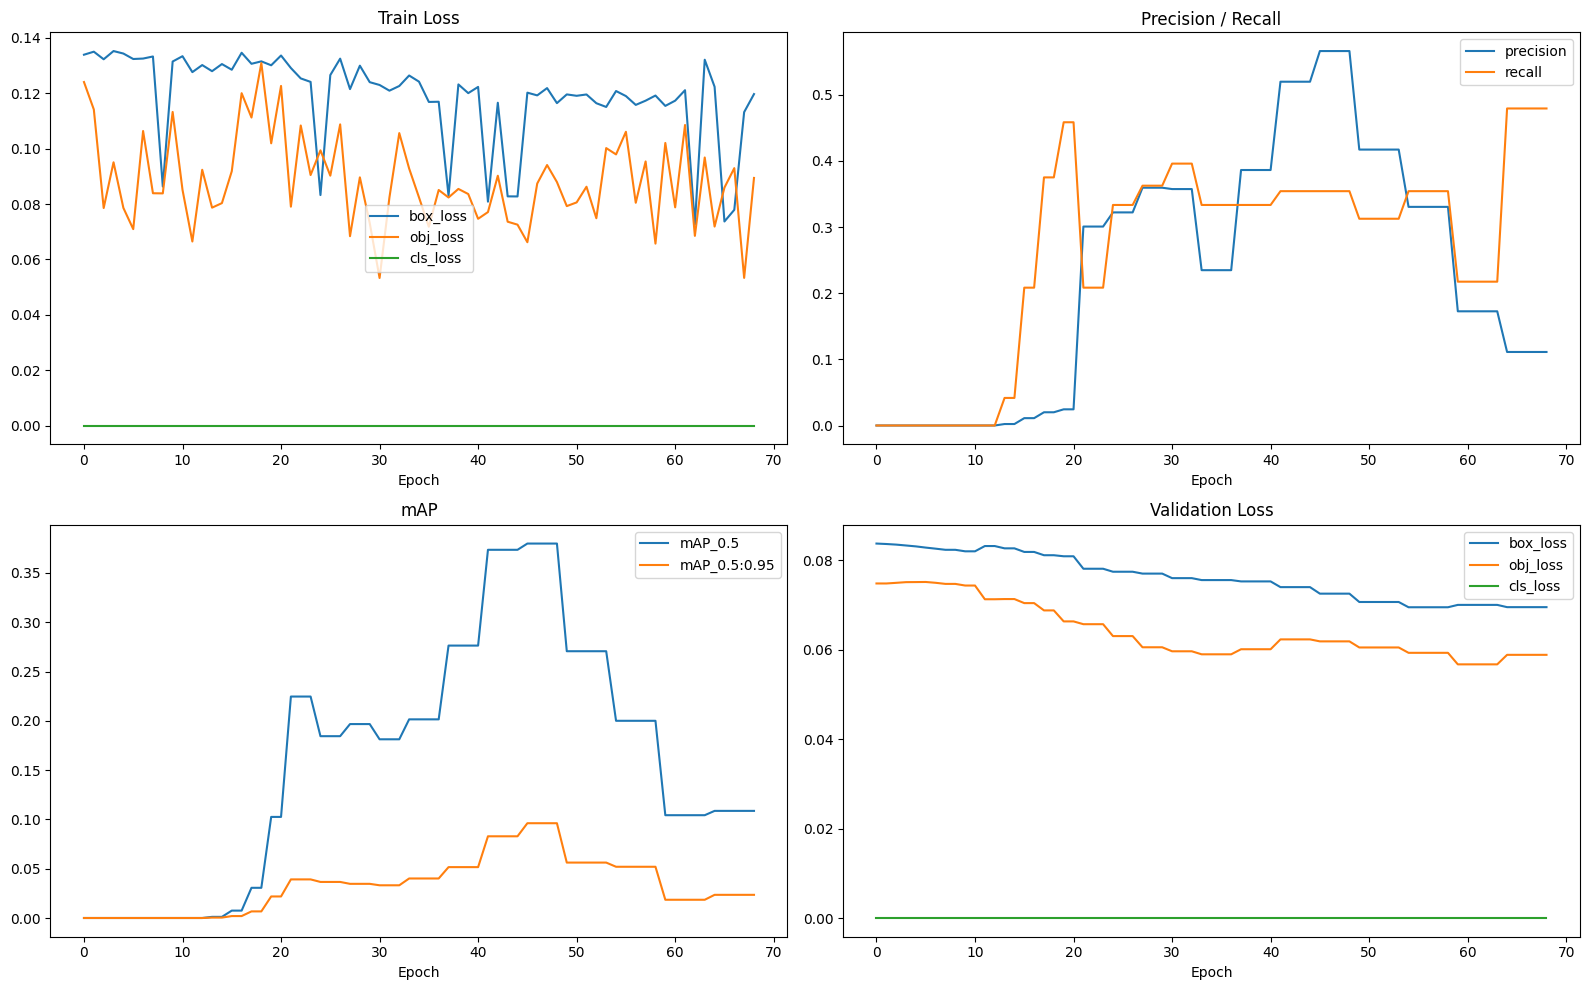

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import os

# Найти последнюю папку обучения colony_detection*
train_dirs = sorted(Path('runs/train').glob('colony_detection*'), key=os.path.getmtime)
if not train_dirs:
    raise FileNotFoundError("Не найдена папка colony_detection_v*/ в runs/train/")
log_dir = train_dirs[-1]
csv_path = log_dir / 'results.csv'
print(f"Загружаем метрики из: {csv_path}")

# Загрузка CSV
df = pd.read_csv(csv_path)

# Удаляем лишние пробелы в именах столбцов
df.columns = df.columns.str.strip()

print("Доступные колонки:", df.columns.tolist())

# Функция для безопасного построения графиков по указанным столбцам
def plot_if_exists(ax, df, columns, title):
    found = False
    for col in columns:
        if col in df:
            ax.plot(df[col], label=col.split('/')[-1])
            found = True
    if found:
        ax.set_title(title)
        ax.set_xlabel('Epoch')
        ax.legend()
    else:
        ax.set_title(f'{title} (нет данных)')
        ax.set_xlabel('Epoch')

# Построение графиков в виде 4-х подграфиков
fig, axs = plt.subplots(2, 2, figsize=(16, 10))

plot_if_exists(axs[0, 0], df, ['train/box_loss', 'train/obj_loss', 'train/cls_loss'], 'Train Loss')
plot_if_exists(axs[0, 1], df, ['metrics/precision', 'metrics/recall'], 'Precision / Recall')
plot_if_exists(axs[1, 0], df, ['metrics/mAP_0.5', 'metrics/mAP_0.5:0.95'], 'mAP')
plot_if_exists(axs[1, 1], df, ['val/box_loss', 'val/obj_loss', 'val/cls_loss'], 'Validation Loss')

plt.tight_layout()
plt.show()